# **Used Car Price Prediction**

In [1]:
! pip install --upgrade "kaleido==0.1.*"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading and Data Exploration

---------

## Load Data

The dataset is from Kaggle [https://www.kaggle.com/datasets/tunguz/used-car-auction-prices/data]

In [3]:
# Import dataset
dfcar = pd.read_csv('https://drive.google.com/uc?id=1KfTnuIeppn-b5bdMyIvVVbII_P7m1Tnu', on_bad_lines="skip")
dfcar.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


**Data Dictionary**  
1. Date : The year of production of the cars.  
2. Make : The brand of the car.  
3. Model : The edition of the car of a specific brand.  
4. Trim : The trim levels for a car are just different versions of the model.  
5. Body : The body style of a vehicle refers to the shape and model of a particular car make.  
6. Transmission : The mechanism that moves the power from the engine to the wheels.  
7. VIN : Vehichel identification number.  
8. State : The state in which the car is auctioned.  
9. Condition : The condition of the cars being at the time of auction.  
10. Odometer : The distance the car has travelled since manufactured.  
11. Color : Exterior color of the car.  
12. Interior : Interior color of the car.  
13. Seller : The seller of the car, car dealers.  
14. **mmr : Manhiem Market Report, the market estimated price of the cars. (Target)**
15. sellingprice : The price a car was sold at auctions.  
16. saledate : The date on which the car has been sold.  

## Data Exploration

In [4]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
# Check null values
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

1. In total, there are 558,811 entries.
2. The data types are int, float and object, and appear to be in accordance with the columns. However, for the `saledate` column the initial data type is 'object' needs to be changed to datetime.
3. There are 9 features that have Null values, there are `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`. There needs to be follow-up on Data Cleaning.

In [6]:
# Check duplicated rows
dfcar.duplicated().sum()

0

No duplicated rows.

In [7]:
# Categorize the features
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Set display float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. `condition` has a categorical value between 1-5.
2. The value of the `odometer` appears to have a large distance between min and max where the min value is 1 and the max is almost 1 million. Of course, this is something that seems odd. Apart from that, the mean and median values are also very far apart, namely 16,000.
3. Overall, the `mmr` and `sellingprice` values are not very different. However, the min-max and mean-median values are very different.
4. Some columns in the numerical feature also have null values, so they need to be handled at the next stage.

In [8]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


1. From the data above, we can see at a glance what values are the top ones, appear frequently, and how many unique values each feature has.
2. For example, Ford is the most popular brand among a total of 96 other brands. Apart from that, the sedan body is also one of the most favorite.
3. Automatic transmission is more sought after by customers than manual by more than 90%.
4. Black dominates both the exterior and interior colors.

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS

### Unique Value From Some Features

In [9]:
# Check unique value 'year'
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

All values are appropriate in the form of numbers starting from 1982 to 2015.

In [10]:
# Check unique value 'make'
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

There is a null value in the `make` feature. Apart from that, the value of the `make` column is still too diverse, where there are words with capital letters, all upper case, and all lower case. Therefore, we will change the values to all lowercase in the next stage. The same thing might also happen to other object type features.

In [11]:
# Check unique value 'trim'
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

The `trim` feature has more than 1000 unique values so only a few of them appear.

### Outliers (year, condition, odometer, MMR, sellingprice)

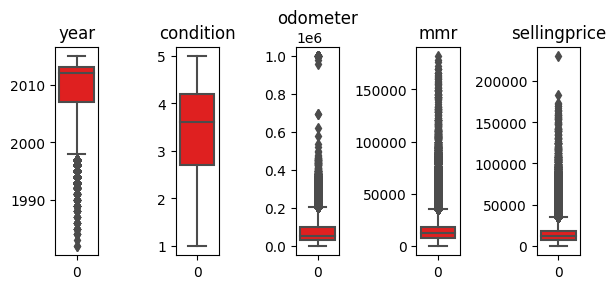

In [12]:
# Outliers

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

It can be seen that `mmr` and `sellingprice` have the most outliers, as do the `odometer` and `year` columns. The quartiles and median also seem far away. This can happen because there is a lot of car data (500k++) so the MMR, selling price and odometer values also vary greatly. The column that looks the most normal is the `condition` column.

### Data Distribution (year, condition, odometer, MMR, sellingprice)

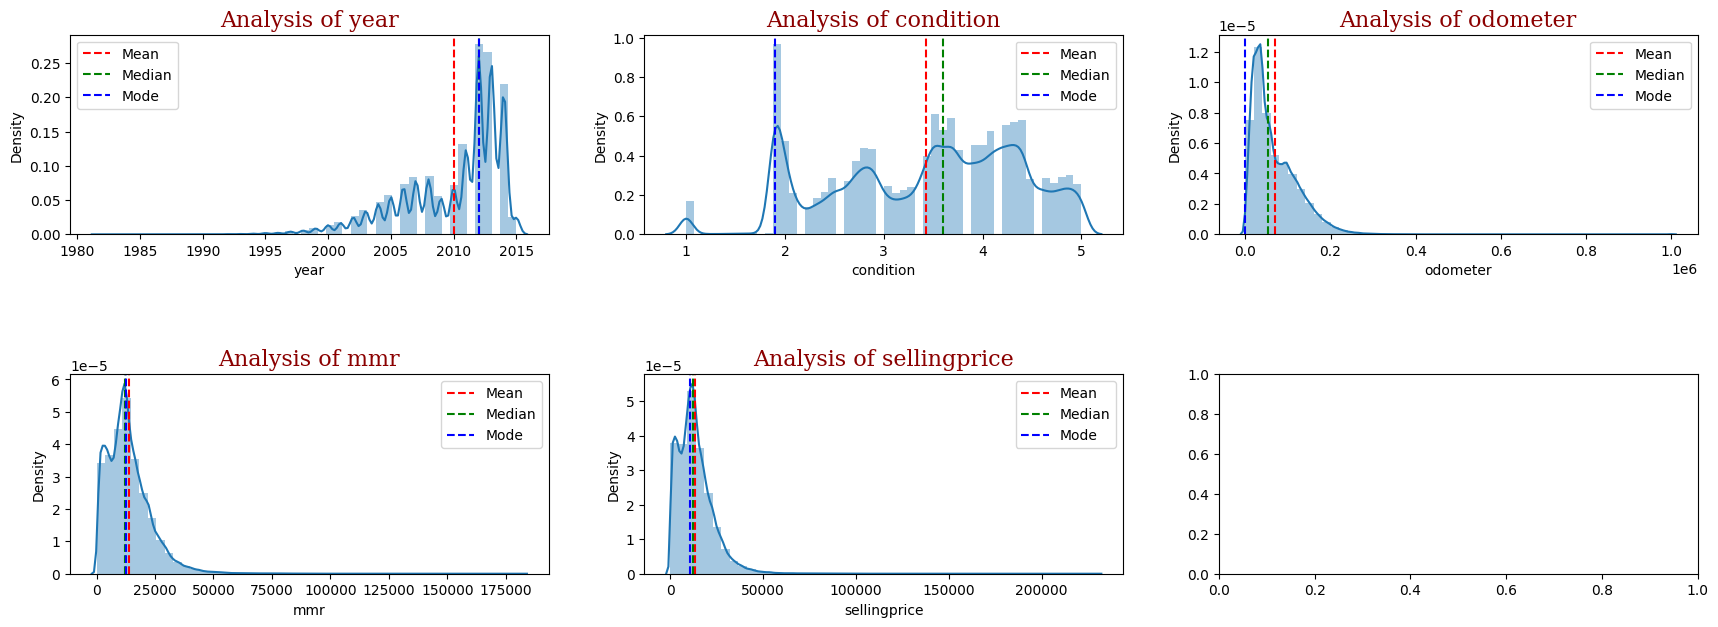

In [13]:
def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=3,figsize=(21,7))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

generate_distribution_plot(dfcar, num)

From the graph above we can conclude:
1. From the `year` column we can see that sales tend to increase every year and peak sales were between 2010 and 2015. We can also see that the `year` column is left-skewed.
2. In the `condition` column, the condition of the car that is in the range of number 2 is the majority of the other conditions. This shows that the condition of the used car isn't good. However, there are quite a few cars in the condition that are rated 3 or above to 4.
3. For the 'odometer', it can be seen that the majority are in the numbers 0 to 0.2, which means the odometer ranges from 0 to 200k. Meanwhile, using cars over 200k is relatively rare.
4. The `mmr` and `sellingprice` columns look similar.
5. The `odometer`, `mmr`, and `sellingprice` columns are right-skewed.

### Checking Abnormal Values

Like the previous analysis where we found min and max values that seemed unreasonable, we will further check the data containing these values.

The columns are `odometer`, `mmr`, and `sellingprice`.

**1. Min and Max From Odometer**

In [14]:
# Rows with 'odometer' = 1 (min)
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
68037,2001,Nissan,Xterra,XE,SUV,automatic,5n1ed28y11c516914,tx,2.000,1.000,blue,gray,titlemax/windcrest tx1,4075,2200,Wed Jan 28 2015 02:00:00 GMT-0800 (PST)
290598,1996,Mercedes-Benz,E-Class,E320,Sedan,automatic,wdbjf55f1tj011289,ca,2.000,1.000,silver,gray,elad motors,1675,950,Tue Feb 17 2015 04:00:00 GMT-0800 (PST)
231969,2005,Honda,Element,EX,SUV,automatic,5j6yh186x5l004986,il,2.100,1.000,—,gray,fletcher jones automotive ent,9375,4000,Tue Feb 03 2015 02:30:00 GMT-0800 (PST)


In [15]:
# Rows with 'odometer' = 999999 (max)
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
404788,2013,Kia,Optima,SX,Sedan,automatic,5xxgr4a68dg206430,ga,1.000,999999.000,white,beige,kia motors finance,17450,400,Thu Mar 12 2015 05:30:00 GMT-0700 (PDT)
490450,2002,Ford,Expedition,Eddie Bauer,suv,automatic,1fmru17l72la49923,tx,2.000,999999.000,black,gray,titlemax/leon valley tx1,600,600,Wed Jun 03 2015 03:20:00 GMT-0700 (PDT)
76882,2008,Chevrolet,Impala,LS,Sedan,automatic,2g1wb55k689100531,md,1.900,999999.000,gray,—,automotive credit corp,1850,1100,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


From the min and max of the `odometer` column above, it can be seen that the data not only contains min and max values that are far away but other columns are also abnormal. This can be seen from the sample above where the min and max rows also contain many null values, low mmr and selling price values, and poor conditions.

**2. Min from Selling Price**

In [16]:
# Rows with 'sellingprice' = 1 (min)
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


**3. Min from MMR**

In [17]:
# Rows with 'mmr' = 25 (min)
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
167070,1999,Dodge,Durango,SLT,SUV,automatic,1b4hs28y4xf510777,la,1.900,301645.000,blue,gray,automotive remarketing inc/resale auto,25,300,Wed Jan 21 2015 04:00:00 GMT-0800 (PST)
130627,2002,Chevrolet,Malibu,Base,Sedan,automatic,1g1nd52j12m639067,fl,1.900,284296.000,red,gray,petes auto detailing auto sales llc,25,300,Wed Jan 14 2015 07:00:00 GMT-0800 (PST)
386755,2002,NaN,NaN,NaN,NaN,NaN,kmhcg35g32u173308,qc,2.200,296901.000,black,gray,auto deall,25,250,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)


From the data above, where the sellingprice is 1 and mmr is $25, there are many null values, the `sellingprice` value is relatively small, and the condition isn't good. This data will be handled later at the data cleansing stage.

## MULTIVARIATE ANALYSIS

### Correlation Heatmap

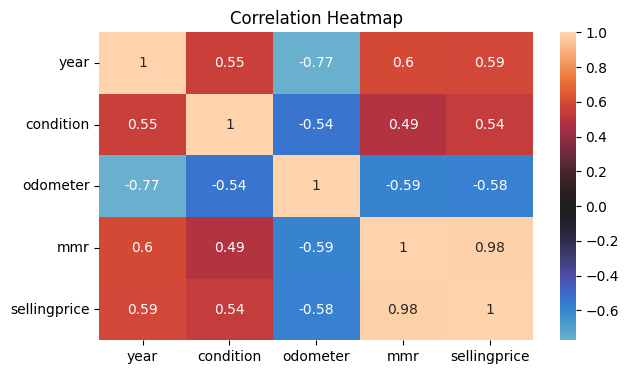

In [18]:
# Correlation Heatmap
corr_matrix = dfcar.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, color='blue', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. The correlation between `year` and `sellingprice` is positive, indicating that the newer the car, the higher the selling price.
2. The `condition` column has a positive correlation with `sellingprice`, which means the better the condition of the car, the higher the selling price.
3. The `odometer` column has a negative correlation with `sellingprice`, indicating that the less mileage, the higher the selling price.
4. The `mmr` column has a fairly strong positive correlation with `sellingprice`, indicating that the selling price predicted by MMR has a good correlation with the actual selling price.
5. The 'Year' and 'Odometer' columns also show a fairly high negative correlation, meaning that the latest cars have odometers that tend to be small

### Correlation Between MMR and Selling Price

As the results of the previous analysis where the MMR and Selling Price values are highly similar, we will try to visualize the relationship between them.

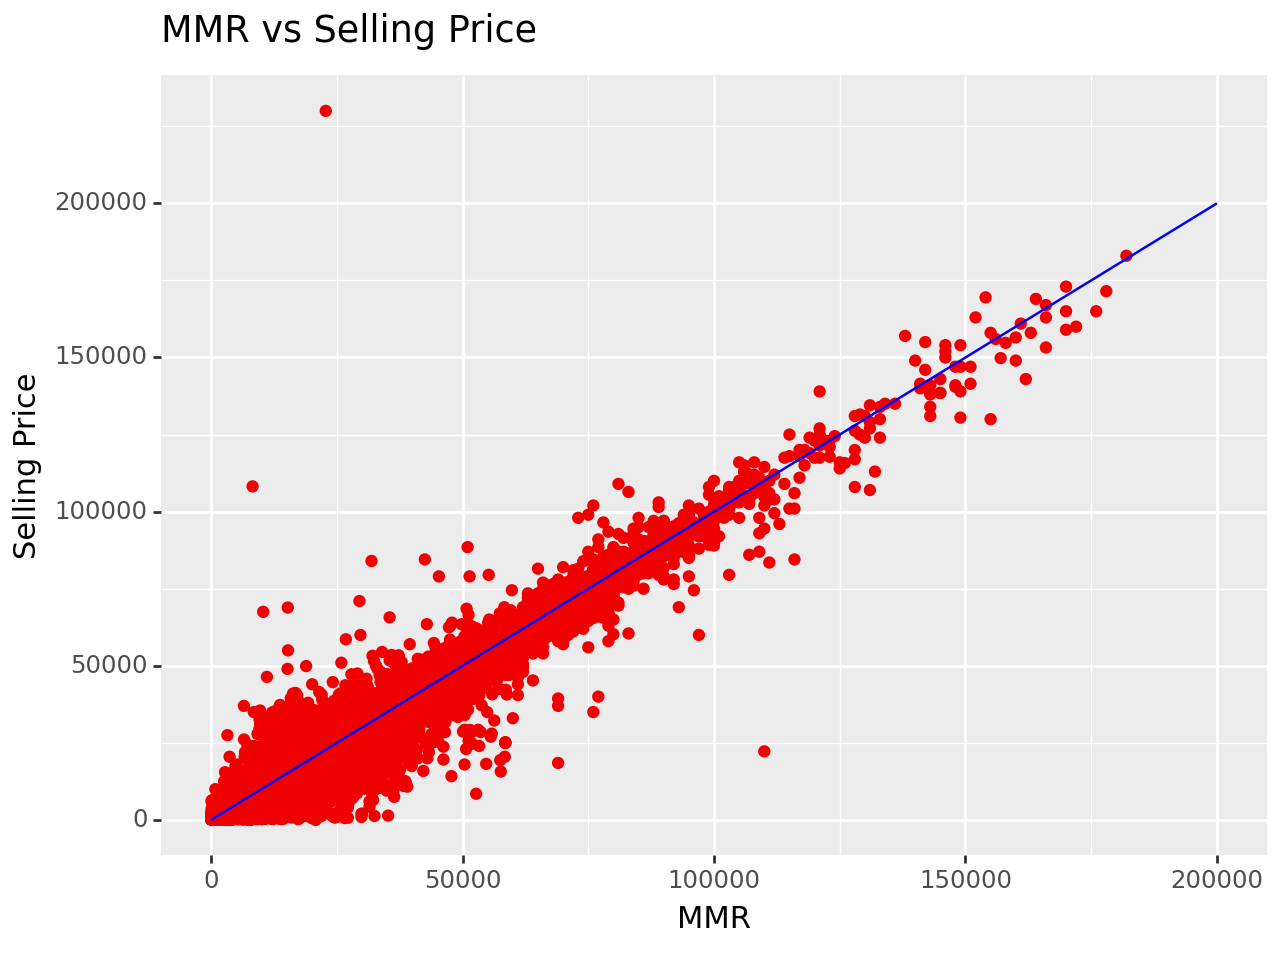

<Figure Size: (640 x 480)>

In [19]:
from plotnine import *

# MMR and Selling Price
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice')
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

MMR is an abbreviation for Manhiem Market Report, a specific report which is an indicator of wholesale prices for used vehicles. Price calculations are based on more than 10 million sales transactions over the previous 13 months at exact prices by vehicle sales at Manheim auction houses.
So, it can be said that MMR is worthy of being used as a price reference.

----------

# BUSINESS INSIGHT AND VISUALIZATION

Here are some business insight :  

**1. Pricing from MMR**  

**2. The Growth of Transaction Amount and Number of Transaction**  

**3. Top Brand**  

##1. MMR as the Target
First we will use dataset copy to separate insight mining and modeling.
Then, look at how sales are and divide the car data into 2 categories (based on targets) : Above MMR and Below MMR.

In [20]:
# Copy dataset
copy = dfcar.copy()

# 'is_sold_below_mmr' (1=Yes, 0=No)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Sales Percentage
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_sold_below_mmr,,
0,272386,48.740
1,286425,51.260


In [21]:
copy.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,is_sold_below_mmr
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1


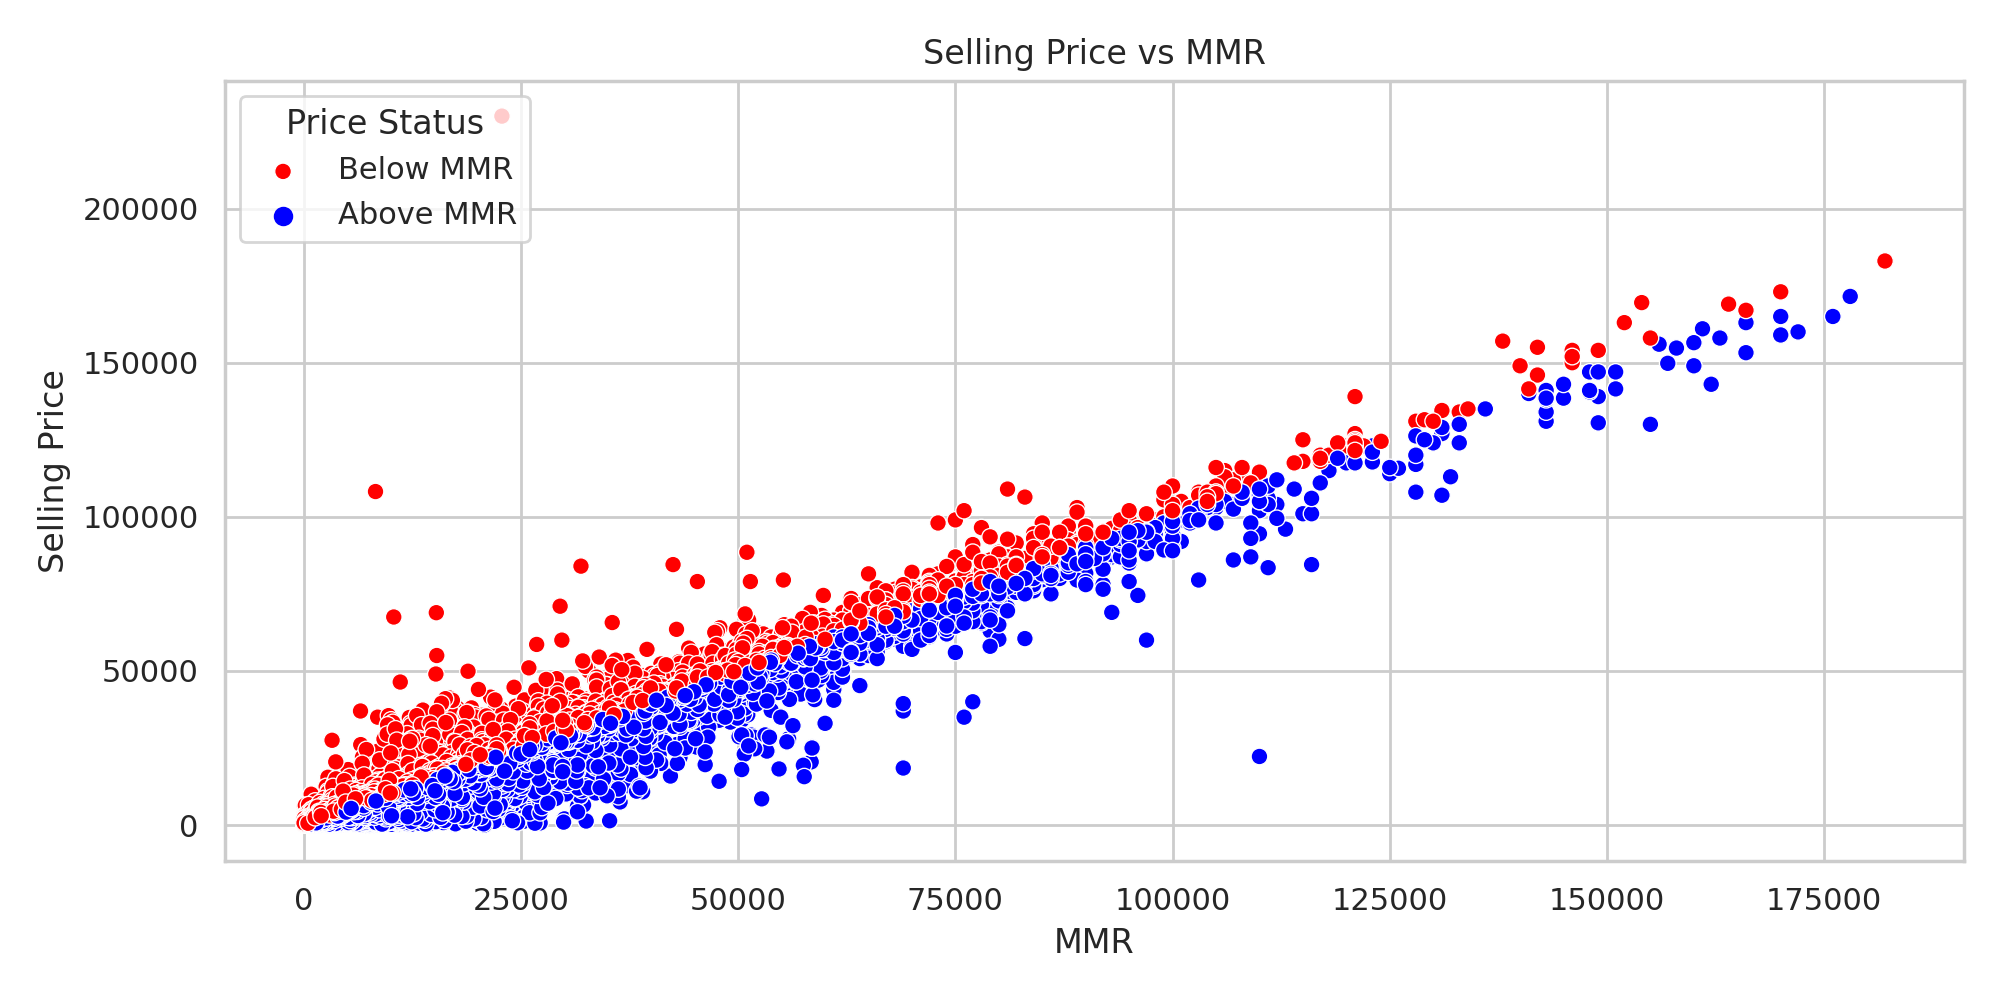

In [22]:
copy['Price_Status'] = copy['sellingprice'] > copy['mmr']
sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=copy, x='mmr', y='sellingprice', hue='Price_Status', palette={True: 'red', False: 'blue'})
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.title('Selling Price vs MMR')
plt.legend(title='Price Status', loc='upper left', labels=['Below MMR', 'Above MMR'])

plt.tight_layout()
plt.show()

## 2. The Growth of Transaction Amount and Number of Transactions

In [23]:
# Slicing the saledate
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

# Grouping monthly sale 'month_year'
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'sellingprice' : 'sum'}).reset_index()
monthly_sale_summary.columns = ['Date', 'Total_Transaction', 'Transaction_Amount']
# Sorting Date
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['Date'], key=lambda x: x.map(custom_dict))
monthly_sale_summary

,Date,Total_Transaction,Transaction_Amount
4,Jan-14,206,3204525
2,Feb-14,1,10500
1,Dec-14,53520,604434205
5,Jan-15,140609,1868476267
3,Feb-15,163053,2218860327
8,Mar-15,46277,622105273
0,Apr-15,1450,14799755
9,May-15,52451,752215356
7,Jun-15,99944,1499947215
6,Jul-15,1300,22069764


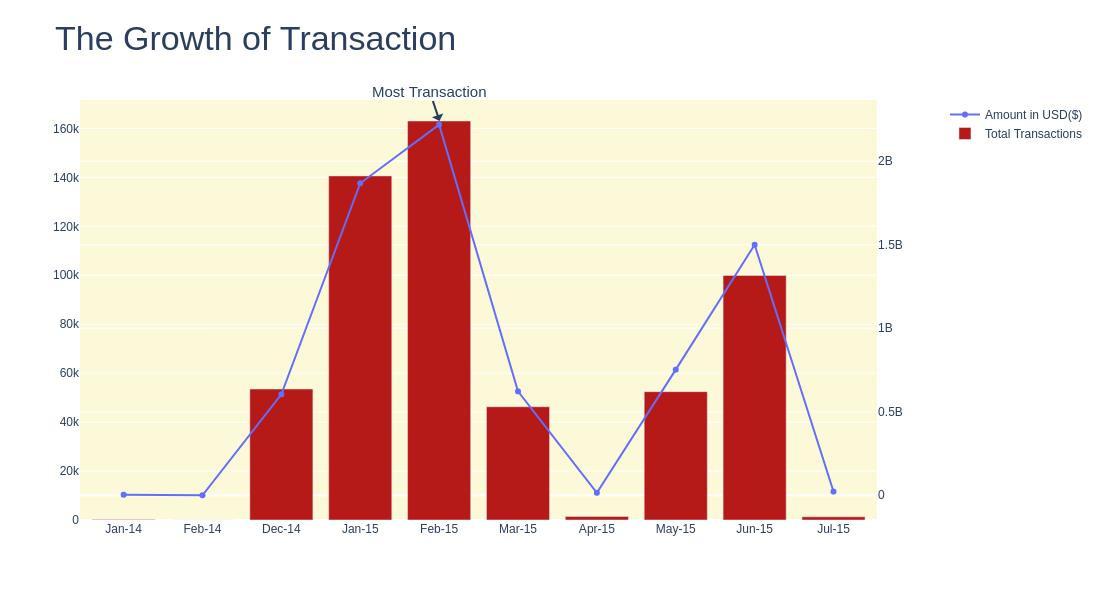

In [24]:
from plotly.subplots import make_subplots
fig = go.Figure()
trace1 = go.Scatter(x=monthly_sale_summary.Date, y=monthly_sale_summary.Transaction_Amount, name='Amount in USD($)')
trace2 = go.Bar(x=monthly_sale_summary['Date'], y=monthly_sale_summary['Total_Transaction'], marker_color='#b51a18', name='Total Transactions')

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Transactions")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1, secondary_y=True)
fig.add_trace(trace2)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.424, y=0.95, text='Most Transaction', font =dict(size=15), showarrow=True, arrowhead=1, arrowsize=1, arrowwidth=2))

fig['layout'].update(height = 600, width = 1100, title = "The Growth of Transaction", title_font_size=34, plot_bgcolor='#fcf9d9', annotations=annotations)
fig.show('png')

The graph above shows that February 2015 was the peak of transactions with a total of around 160k transactions and total revenue of around $2 billion. In contrast to January-February 2014 and also in April and July 2015 with the least transactions.

## 3. Top Brand

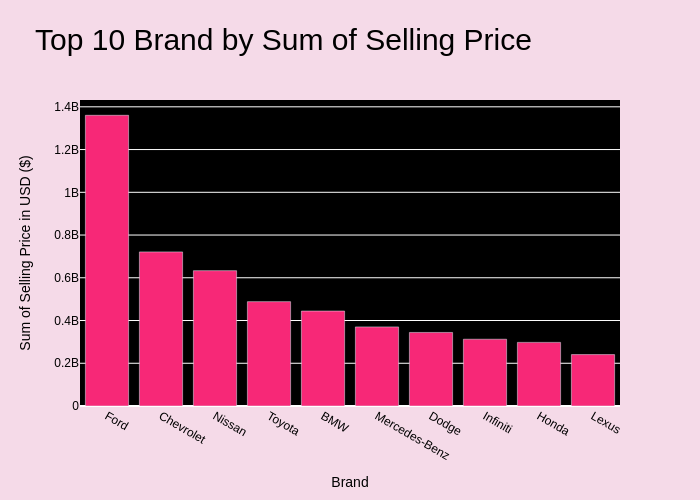

In [25]:
# Brand
sum_make = copy.groupby('make')['sellingprice'].sum().reset_index()
sum_make = sum_make.sort_values(by='sellingprice', ascending=False)

top_10 = sum_make.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10['make'], y=top_10['sellingprice'], marker_color='#f72877'))
fig.update_layout(title='Top 10 Brand by Sum of Selling Price',
                  title_font_size=30,
                  xaxis_title='Brand',
                  yaxis_title='Sum of Selling Price in USD ($)',
                  plot_bgcolor='black',
                  paper_bgcolor='#f5dae8',
                  font=dict(color='black'))
fig.show('png')

Ford is the most popular brand with total revenues of almost $1.4B, indicating that Ford has a strong market. Then there was a significant decline in the second popular car, Chevrolet. Meanwhile, Chevrolet, Nissan, Toyota, etc. show a constant difference or the gap is not too big.

# Data Preparation

----

## Data Cleansing

### Dropping

**Duplicated Rows**

In the previous Data Exploration stage, there were no duplicate rows so they didn't need to be handled.

**Rows with Abnormal Values**

In [26]:
dfcar2 = dfcar.copy()

In [27]:
# Drop nilai min odo
i_min_odo = dfcar2[((dfcar2.odometer == 1.000))].index
dfcar2 = dfcar2.drop(i_min_odo)

In [28]:
# Drop nilai max odo
i_max_odo = dfcar2[((dfcar2.odometer == 999999.000))].index
dfcar2 = dfcar2.drop(i_max_odo)

In [29]:
# Drop nilai min sellingprice
i_min_price = dfcar2[((dfcar2.sellingprice == 1.000))].index
dfcar2 = dfcar2.drop(i_min_price)

In [30]:
# Drop nilai min mmr
i_min_mmr = dfcar2[((dfcar2.mmr == 25.000))].index
dfcar2 = dfcar2.drop(i_min_mmr)

In [31]:
dfcar2.shape

(557391, 16)

**Irrelevant Features**

Some features seem less relevant and their unique value is too broad, as we have analyzed previously. So it is assumed that these features do not have a particular pattern. These features are `vin`, `sellingprice`, and `saledate` which will be removed. The reasons are:  
a. `vin` is not a feature that determines the price of a car because it's juts the identification number for the car.  
b. `sellingprice` has a high correlation (0.98) with `mmr` (target feature).  
c. `saledate` does not show a significant factor because the time is too broad and uncertain so there is no special pattern that influences the selling price of a car.

In [32]:
# Delete the irrelevant features
dfcar2 = dfcar2.drop(['vin','sellingprice','saledate'], axis=1)
dfcar2.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,16639.000,white,black,"kia motors america, inc",20500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900


### Handle Unique Values

In some features there are many unique values as previously explored. We will handle unique values into:  
1. All categorical data except saledate will be changed to lower case to get the same unique value.  
2. The " — " value in the `color` and `interior` features will be replaced with the mode value, that is black.

In [33]:
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar2 = content_consistent(dfcar2)

In [34]:
import re

# Replace color and interior
dfcar2['color'].replace('—','black',inplace=True)
dfcar2['interior'].replace('—','black',inplace=True)

# Replace model dan trim by remove special characters
dfcar2['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# Replace same meaning of value
dfcar2['make'].replace('landrover','land rover',inplace=True)
dfcar2['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar2['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar2['make'].replace('vw','volkswagen',inplace=True)
dfcar2['make'].replace('ford tk','ford truck',inplace=True)
dfcar2['body'].replace('koup','coupe',inplace=True)
dfcar2['body'].replace('regular-cab','regular cab',inplace=True)
dfcar2['body'].replace('xtracab','extended cab',inplace=True)

In [35]:
# View the results of handling value and column inconsistencies
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar2[c].describe()

,make,model,trim,body,color,interior,state,seller
count,547162,547064,546817,544286,556662,556662,557391,557391
unique,61,841,1883,42,19,16,38,14152
top,ford,altima,base,sedan,black,black,fl,nissaninfiniti lt
freq,93834,19322,55641,240696,135399,260895,82780,19691


After cleaning the data by generalizing the string writing, the results are visible:  
a. `make` which was originally 96 now only has 61 unique values  
b. `model` which was originally 973 now only has 841 unique values  
c. `trim` which was originally 1975 now only has 1883 unique values  
d. `body` which was originally 86 now only has 42 unique values  
e. `seller` which was originally 14264 now only has 14152 unique values  
f. `color` and `interior` are reduced by 1 value from the previous unique value because they have been replaced by the mode value (black).  
g. `state` is the only one that still has the same value.

### Handle Missing Values

There are 9 features that have Null values, they are `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.  

1. All categorical data will be filled with mode.  
2. `condition` which has a fairly normal distribution of data, will be replaced by mean.  
3. `odometer` which only has 94 null values, will be deleted.

In [36]:
# Imputation of null values with mode
mode_value = dfcar2.filter(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']).mode()
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

dfcar2[cols] = dfcar2[cols].fillna(dfcar.mode().iloc[0])

In [37]:
# Imputation of null values with mean
dfcar2['condition'] = dfcar2['condition'].fillna(dfcar2['condition'].mean())

In [38]:
# Removes remaining null values
dfcar2.dropna(axis=0, inplace=True)
dfcar2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

### Handle Outliers

In [39]:
df_clean = dfcar2.copy()

In [40]:
# Function to check for outliers
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    column_name = df.columns[column]
    total_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    percent_outliers = round(((total_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total Outliers of ', column_name, ' :', total_outliers, ' and outliers percentage:', percent_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('Check the Input')

In [41]:
# Check the total outliers
column = [0, 7, 8, 12]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Total Outliers of  year  : 6025  and outliers percentage: 1.08 %
Total Outliers of  condition  : 0  and outliers percentage: 0.0 %
Total Outliers of  odometer  : 10270  and outliers percentage: 1.84 %
Total Outliers of  mmr  : 16307  and outliers percentage: 2.93 %


In [43]:
# Delete outliers
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 0, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 8, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 12, 'df').reset_index()['index'])]
df_clean.shape

(517249, 13)

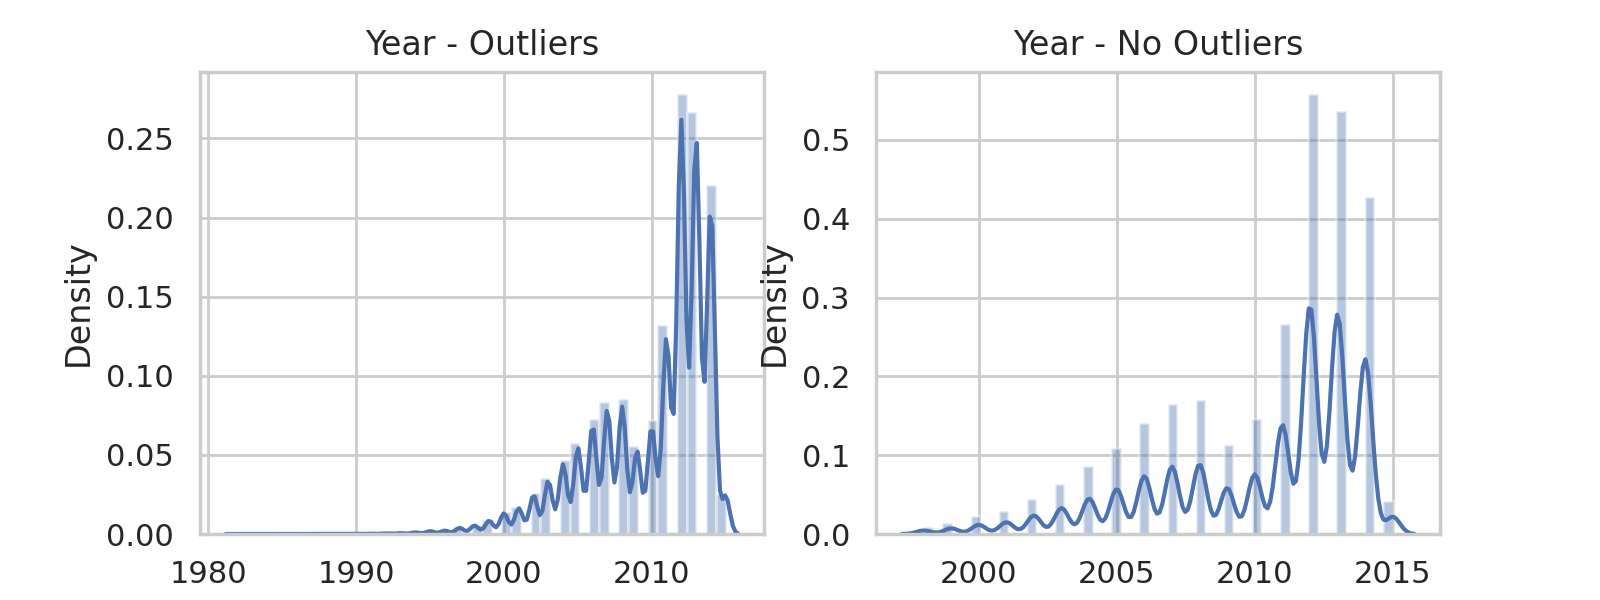

In [44]:
# Create a plot to compare before and after removing outliers
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.year)
plt.title('Year - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.year)
plt.title('Year - No Outliers')
plt.show()

In [45]:
# Skewness before handle outliers
print(f"Before - Skewness Coefficient of Year : {round(dfcar2.year.skew(), 3)}")

# Skewness after handle outliers
print(f"After - Skewness Coefficient of Year : {round(df_clean.year.skew(), 3)}")

Before - Skewness Coefficient of Year : -1.186
After - Skewness Coefficient of Year : -1.049


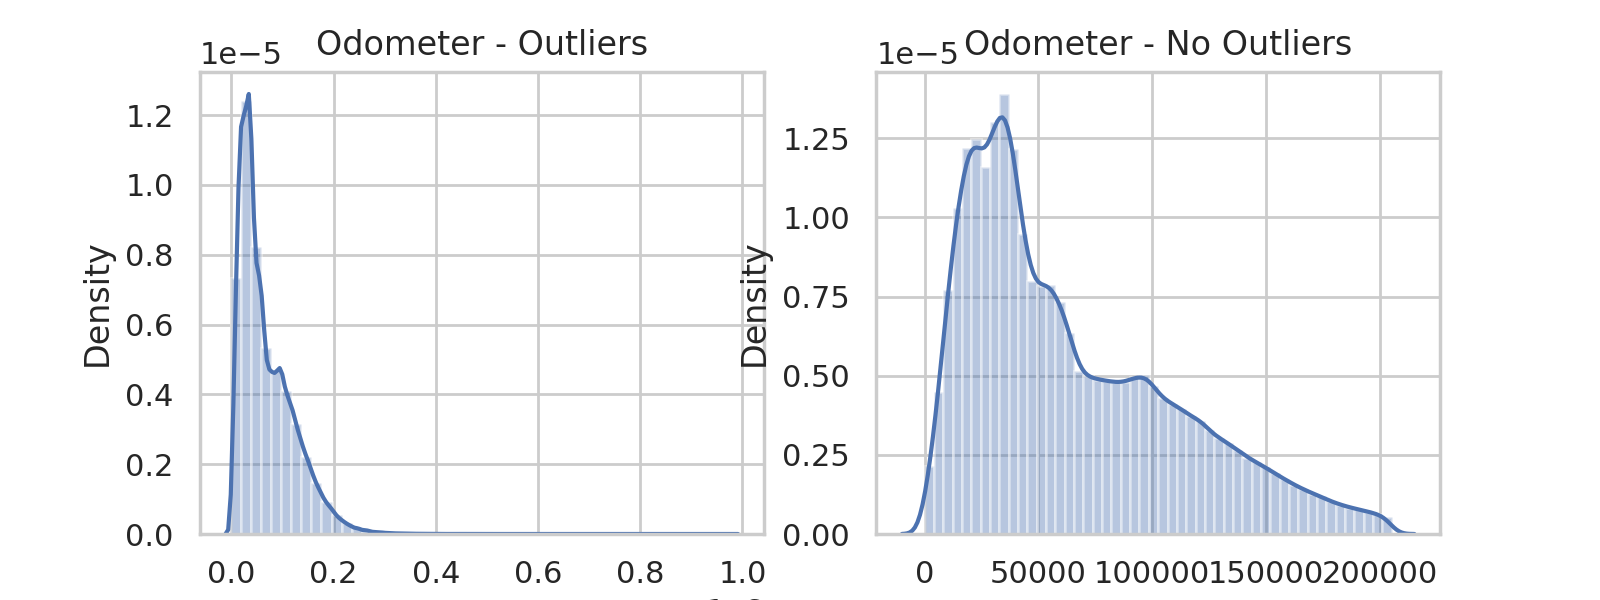

In [46]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.odometer)
plt.title('Odometer - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.odometer)
plt.title('Odometer - No Outliers')
plt.show()

In [47]:
# Skewness before handle outliers
print(f"Before - Skewness Coefficient of Odometer : {round(dfcar2.odometer.skew(), 3)}")

# Skewness after handle outliers
print(f"After - Skewness Coefficient of Odometer : {round(df_clean.odometer.skew(), 3)}")

Before - Skewness Coefficient of Odometer : 1.236
After - Skewness Coefficient of Odometer : 0.867


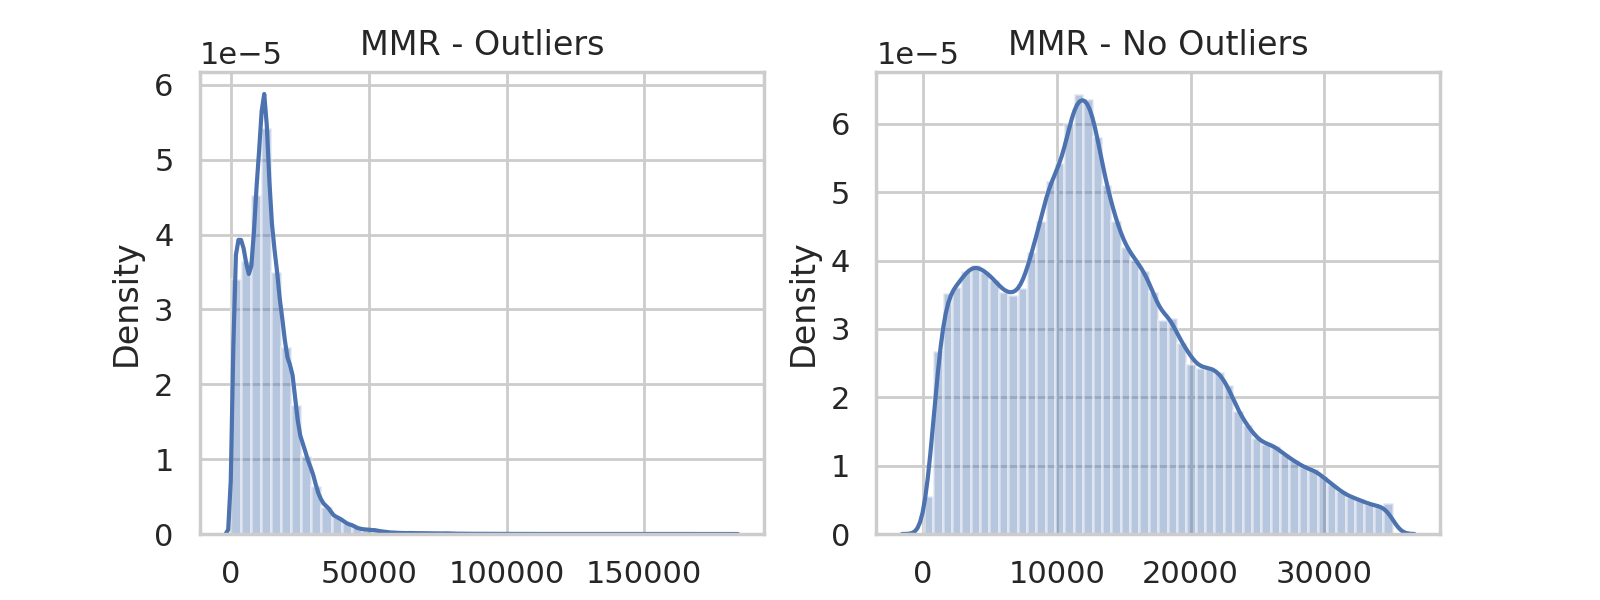

In [48]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.mmr)
plt.title('MMR - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.mmr)
plt.title('MMR - No Outliers')
plt.show()

In [49]:
# Skewness before handle outliers
print(f"Before - Skewness Coefficient of MMR : {round(dfcar2.mmr.skew(), 3)}")

# Skewness after handle outliers
print(f"After - Skewness Coefficient of MMR : {round(df_clean.mmr.skew(), 3)}")

Before - Skewness Coefficient of MMR : 1.998
After - Skewness Coefficient of MMR : 0.538


## Feature Engineering

### Feature Extraction

Because the dataset contains many categorical features, we need to convert them first into numbers. But before that, we need to carry out feature extraction to see patterns that can simplify the feature encoding.

#### 1. Overall
Overall rating of the car, grouped by the mean of MMR from `condition` and `odometer`.

In [50]:
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 472338.000 472338.000
mean   13035.790  13030.959
std     7446.204   7446.981
min       50.000     50.000
25%     7425.000   7425.000
50%    12250.000  12250.000
75%    17700.000  17700.000
max    35100.000  35100.000

In [51]:
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### 2. Made In

Simplify the value in the `make` feature by categorizing car brands according to the country of origin.

In [52]:
# Car brand groups based on country of origin
us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### 3. Top Make
Brand segmentation based on 11 top brands. The rest of them will be labelled as 'Other'.

In [53]:
# Top Brand based on Year of making
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

,make,top_make
13,ford,ford
7,chevrolet,chevrolet
34,nissan,nissan
46,toyota,toyota
10,dodge,dodge
17,honda,honda
19,hyundai,hyundai
24,kia,kia
8,chrysler,chrysler
4,bmw,bmw


In [54]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'infiniti', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

### Feature Selection

In [55]:
# Select the features
df_clean = df_clean.drop(['make', 'transmission'], axis=1)
df_clean.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,mmr,Overall,made_in,top_make
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,20500,Good,KOR,kia
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,20800,Fair,KOR,kia
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,31900,Poor,DEU,bmw


### Feature Encoding

#### One-Hot Encoding  

In [56]:
df_pre = df_clean.copy()

In [57]:
# One Hot Encoding for Categorical Features
df_pre = pd.get_dummies(df_pre, columns=['Overall', 'made_in', 'top_make'])
df_pre.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_infiniti,top_make_kia,top_make_nissan,top_make_toyota
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,...,0,0,0,0,0,0,0,0,0,0


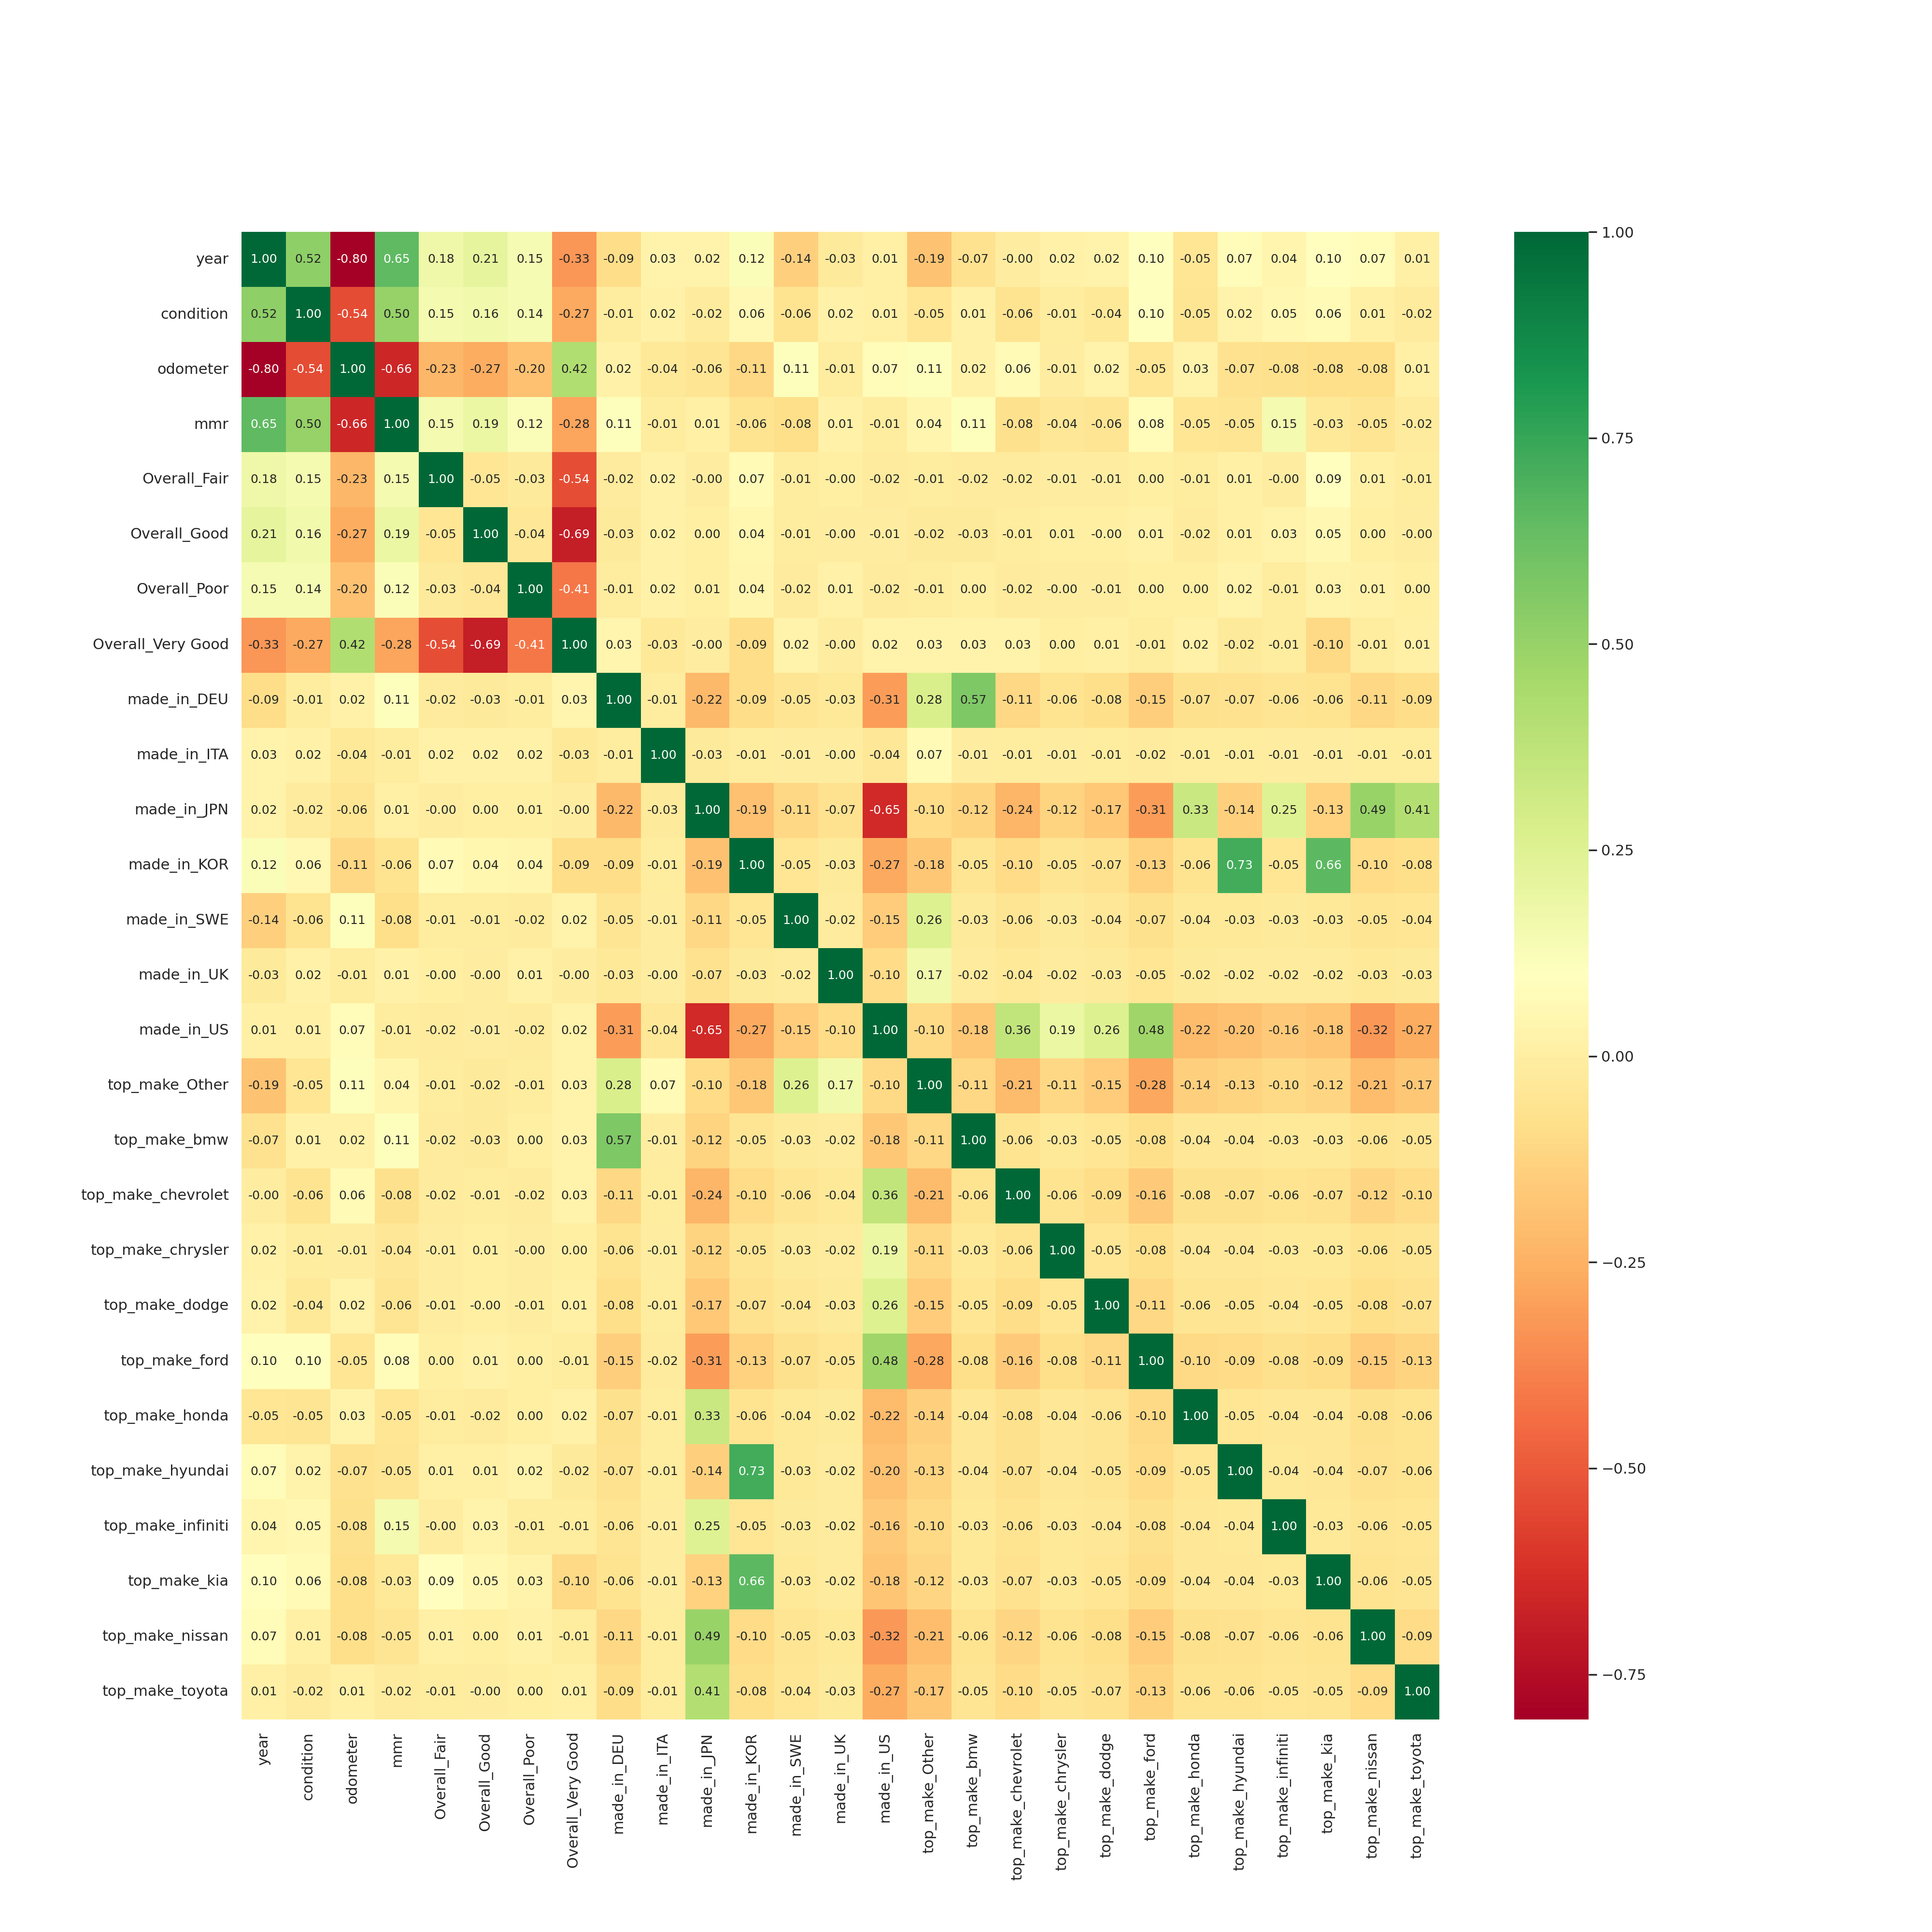

In [58]:
# New Correlation Heatmap
corr_matrix = df_pre.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 9}, ax=ax)
plt.show()

#### Target Encoding
Target encoding is performed on several features to maintain important information contained in category features, especially in the context of target predictions.

In [59]:
pip install --upgrade category_encoders

In [60]:
from category_encoders import TargetEncoder

# Target encoding
cols = ['model', 'trim', 'body', 'state']
target = 'mmr'

encoder = TargetEncoder()
df_pre[cols] = encoder.fit_transform(df_pre[cols], df_pre[target])

#### Count Encoding
This method is used for categorical features where each category is replaced by its frequency of occurrence.

In [61]:
# Count encoding for 'seller'
count_encoding_seller = df_pre['seller'].value_counts().to_dict()
df_pre['seller'] = df_pre['seller'].map(count_encoding_seller)

In [62]:
# Count encoding for 'color'
count_encoding_seller = df_pre['color'].value_counts().to_dict()
df_pre['color'] = df_pre['color'].map(count_encoding_seller)

In [63]:
# Count encoding for'interior'
count_encoding_seller = df_pre['interior'].value_counts().to_dict()
df_pre['interior'] = df_pre['interior'].map(count_encoding_seller)

## Train-Test Split

In [64]:
df_new = df_pre.copy()

In [65]:
from sklearn.model_selection import train_test_split

# Split the data
features = df_new.select_dtypes(["float64", "int64", "boolean", "uint8"]).columns
x = df_new[features].drop('mmr', axis=1)
y = df_new.mmr

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Pre-Processing

In [66]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler    = StandardScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

In [67]:
xtrain.describe()

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_infiniti,top_make_kia,top_make_nissan,top_make_toyota
count,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,...,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000,413799.000
mean,0.000,13208.923,13231.268,13209.602,13210.902,0.000,0.000,80952.568,176955.379,4612.073,...,0.108,0.033,0.057,0.171,0.048,0.041,0.028,0.035,0.101,0.072
std,1.000,4881.966,4494.498,2761.577,1820.256,1.000,1.000,35705.857,75826.098,6128.437,...,0.310,0.178,0.232,0.377,0.214,0.199,0.165,0.183,0.301,0.258
min,-3.382,842.893,1230.836,5062.194,7561.969,-2.611,-1.410,14.000,15.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.626,9704.521,10900.189,11630.940,12944.305,-0.786,-0.787,47736.000,167376.000,134.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.476,12597.847,12683.075,11630.940,13354.606,0.180,-0.292,78285.000,167376.000,1789.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.751,16472.144,15443.997,15368.812,14099.163,0.825,0.662,97987.000,242373.000,6069.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.303,33158.701,32474.084,26441.972,17651.626,1.684,3.039,125471.000,242373.000,19687.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Modelling and Evaluation

## Modelling

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to display model evaluation scores
def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

# Train model linear regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [70]:
# Predict
y_pred = regressor.predict(xtest)

# Show the evaluation
eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2436.0977137902964
RMSE:  3291.185907786734
R2 score:  0.810030933101246
Coefficients:  [ 2.03523304e+03  4.88376039e-01  3.92383879e-01  4.26579584e-01
  1.19316844e-01  3.75744961e+02 -2.37068499e+03  3.61546272e-03
 -1.42713172e-03 -4.66919374e-02  1.48137698e+01  2.92076187e+02
 -1.70077965e+01 -2.89882160e+02  7.44076664e+02 -2.95590575e+03
  1.16655287e+03 -4.99239036e+03  4.40506371e+03  9.35278238e+02
  6.97324638e+02  4.04132477e+02  1.20867332e+03 -2.44445869e+02
 -8.56192227e+02 -7.42183773e+02 -1.27572240e+03 -7.72915930e+01
  3.96396360e+03 -3.60745303e+03  3.45562912e+03 -1.56977179e+03
 -6.59337838e+02]
Intercept:  -5538.784154950514


### Lasso Regression

In [71]:
from sklearn.linear_model import Lasso

# Training model lasso regression
lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [72]:
# Predict
y_pred = lasso.predict(xtest)

eval_regression(lasso, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2436.0755787996263
RMSE:  3291.17059492772
R2 score:  0.8100327008304795
Coefficients:  [ 2.03523304e+03  4.88376039e-01  3.92383879e-01  4.26579584e-01
  1.19316844e-01  3.75744961e+02 -2.37068499e+03  3.61546272e-03
 -1.42713172e-03 -4.66919374e-02  1.48137698e+01  2.92076187e+02
 -1.70077965e+01 -2.89882160e+02  7.44076664e+02 -2.95590575e+03
  1.16655287e+03 -4.99239036e+03  4.40506371e+03  9.35278238e+02
  6.97324638e+02  4.04132477e+02  1.20867332e+03 -2.44445869e+02
 -8.56192227e+02 -7.42183773e+02 -1.27572240e+03 -7.72915930e+01
  3.96396360e+03 -3.60745303e+03  3.45562912e+03 -1.56977179e+03
 -6.59337838e+02]
Intercept:  -5538.784154950514


### Ridge Regression

In [73]:
from sklearn.linear_model import Ridge

# Training model ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)

Ridge()

In [74]:
# Predict
y_pred = ridge.predict(xtest)

eval_regression(ridge, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2436.0995110608196
RMSE:  3291.1855339467706
R2 score:  0.8100309762577416
Coefficients:  [ 2.03523304e+03  4.88376039e-01  3.92383879e-01  4.26579584e-01
  1.19316844e-01  3.75744961e+02 -2.37068499e+03  3.61546272e-03
 -1.42713172e-03 -4.66919374e-02  1.48137698e+01  2.92076187e+02
 -1.70077965e+01 -2.89882160e+02  7.44076664e+02 -2.95590575e+03
  1.16655287e+03 -4.99239036e+03  4.40506371e+03  9.35278238e+02
  6.97324638e+02  4.04132477e+02  1.20867332e+03 -2.44445869e+02
 -8.56192227e+02 -7.42183773e+02 -1.27572240e+03 -7.72915930e+01
  3.96396360e+03 -3.60745303e+03  3.45562912e+03 -1.56977179e+03
 -6.59337838e+02]
Intercept:  -5538.784154950514


### Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Training model random forest
rf = RandomForestRegressor(random_state=104, verbose=False)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=104, verbose=False)

In [76]:
# Predict
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

In [77]:
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  247.88896517391296
MAE test:  668.7068153697438
RMSE train:  449.94032066249184
RMSE test:  1206.3681965865164
R2 score train:  0.996451799901267
R2 score test:  0.9744766416087075


### CatBoost Regressor

In [78]:
pip install catboost

In [79]:
from catboost import CatBoostRegressor

# Training model catboost
catboost = CatBoostRegressor(verbose=False)
catboost.fit(xtrain, ytrain)

In [80]:
# Predict
ytrain_pred = catboost.predict(xtrain)
ytest_pred = catboost.predict(xtest)

evaluasi(catboost, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  910.0835715985107
MAE test:  925.14070797356
RMSE train:  1419.1819355804832
RMSE test:  1461.0342196348556
R2 score train:  0.9647000227383229
R2 score test:  0.9625631899627664


### XGBoost

In [81]:
import xgboost as xgb

# Training model xgboost
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
# Predict
ytrain_pred = xgb_regressor.predict(xtrain)
ytest_pred = xgb_regressor.predict(xtest)

evaluasi(xgb_regressor, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  992.4593133430252
MAE test:  1016.9093579334058
RMSE train:  1531.8508448500309
RMSE test:  1589.204022195932
R2 score train:  0.9588726016619159
R2 score test:  0.9557067680073505


The best model is the **Random Forest** model because it has the highest R2 score and the smallest MAE and RMSE among the other models.

## Evaluation

### Feature Importance

Text(0.5, 1.0, 'Feature Importance Score')

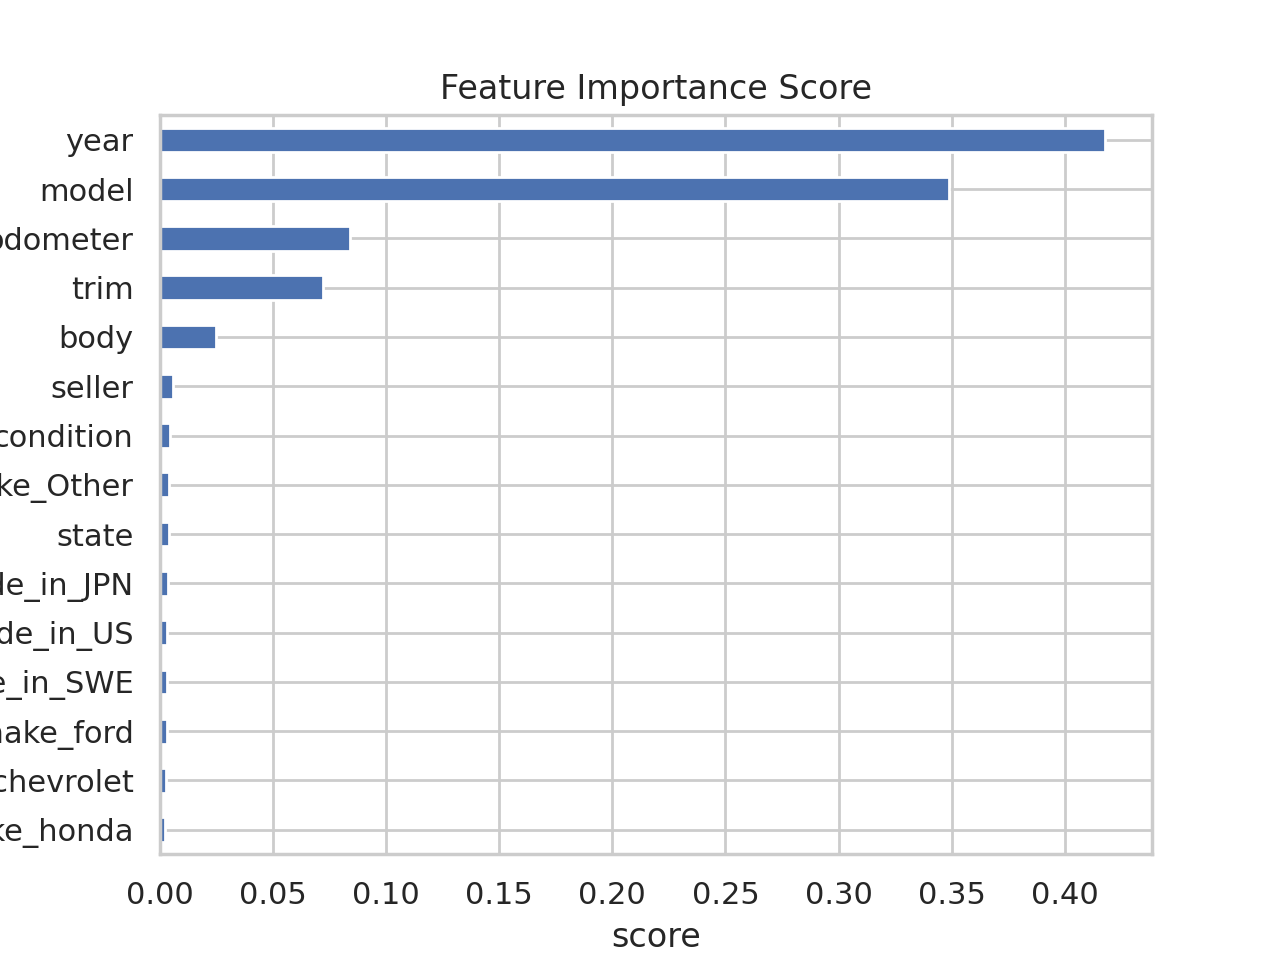

In [83]:
# Displays a feature importance graph
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

### Cross Validation

In [84]:
from sklearn.model_selection import cross_validate

# Cross Validation
SEED = 101
np.random.seed(SEED)

model_cv = RandomForestRegressor(verbose=False)
scores = cross_validate(model_cv, xtrain, ytrain, cv = 5, return_train_score=False)
media = scores['test_score'].mean()
std_dev = scores['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * std_dev)*100, (media + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [97.21%, 97.45%]


------------

## New Selling Price

In [85]:
# Real Price X Predict Price
df_pred = pd.DataFrame(columns=['mmr', 'sellingprice_predicted'])
df_pred['mmr'] = ytest
rf_model = RandomForestRegressor(verbose=False)
rf_model.fit(xtrain, ytrain)
df_pred['sellingprice_predicted'] = rf_model.predict(xtest)
df_pred

,mmr,sellingprice_predicted
510032,13900,13231.000
219976,3075,3426.250
503860,19150,19775.000
127859,16850,17474.000
32685,4350,5023.750
...,...,...
146121,12150,12125.500
187169,21100,20522.500
416640,6500,6087.000
89313,5175,5158.250


**Adding Selling Price Prediction to the Original Dataset**

In [86]:
y_df = pd.DataFrame(data = df_pred, columns = ['sellingprice_predicted'], index = xtest.index.copy())
df_out = pd.merge(dfcar, y_df, how = 'left', left_index = True, right_index = True)
df_out.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),30560.000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.100,14282.000,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.300,2641.000,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [87]:
df_compare = df_out.copy()

# Removing NaN selling price predictions  (NaN means the unused data for modeling)
df_compare.dropna(subset = ['sellingprice_predicted'], inplace=True)

# Create a new column 'is below mmr' for comparison before-after modelling
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)
df_compare

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted,is_below_mmr
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),30560.000,1
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.400,14943.000,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),31538.000,1
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.000,28617.000,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),25325.000,1
24,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,3.800,10736.000,black,black,the hertz corporation,67000,65000,Tue Jan 06 2015 12:30:00 GMT-0800 (PST),28019.000,1
26,2015,Volvo,XC70,T6,Wagon,automatic,yv4902nb3f1198103,ca,4.200,16506.000,brown,brown,volvo na rep/world omni,32100,32500,Thu Feb 26 2015 04:30:00 GMT-0800 (PST),29687.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517227,2012,Nissan,Altima,2.5,sedan,automatic,1n4al2ap9cc188271,il,2.100,32752.000,gray,black,nissan-infiniti lt,11750,11800,Thu Jun 11 2015 03:00:00 GMT-0700 (PDT),19728.000,0
517232,2012,Nissan,Altima,2.5,sedan,NaN,1n4al2ap4cc160202,pa,2.400,18720.000,silver,black,nissan-infiniti lt,12600,11600,Thu Jun 11 2015 06:00:00 GMT-0700 (PDT),22548.500,1
517237,2012,Nissan,Altima,2.5,sedan,NaN,1n4al2ap7cc154393,pa,2.500,10537.000,black,black,nissan-infiniti lt,13100,13200,Thu Jun 11 2015 06:00:00 GMT-0700 (PDT),25253.000,0
517246,2012,Nissan,Maxima,3.5 SV,sedan,automatic,1n4aa5ap1cc803953,fl,1.900,32576.000,gray,beige,nissan-infiniti lt,17200,15000,Tue Jun 09 2015 02:30:00 GMT-0700 (PDT),31491.000,1


The data above is the same as that we used during modeling to (105562 rows of data) which the predicted selling price has been added.

**Comparison**

The Original Dataset

In [88]:
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

transaction = df_compare.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,50374,48.690
1,53076,51.310


In [89]:
# Calculate the average selling price and condition relative to MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice'])
      else:
        spAboveMMR.append(row['sellingprice'])

    print(f'Ori Dataset - Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Ori Dataset - Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_compare)

Ori Dataset - Mean of Selling Price above MMR = 14702.231289951165
Ori Dataset - Mean of Selling Price below MMR = 12422.570427311779


After-Modelling Dataset

In [90]:
df_pred['is_below_mmr'] = df_pred.apply(lambda x: 1 if x.sellingprice_predicted < x.mmr else 0, axis=1)

transaction = df_pred.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,53466,51.680
1,49984,48.320


In [91]:
# Calculate the average selling price and condition relative to MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice_predicted'])
      else:
        spAboveMMR.append(row['sellingprice_predicted'])

    print(f'Model - Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Model- Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_pred)

Model - Mean of Selling Price above MMR = 12959.71196960062
Model- Mean of Selling Price below MMR = 13468.47529209347


# Conclusion

1. With a sample of 20%, the price prediction made shows that the percentage of prices below mmr is 48.19%, where this figure shows a decrease of around 3% from the initial data and prices above mmr also have an increase of 3% compared to the initial data.  

2. After modeling, the average price under MMR is 13468. If we compare to the average price of cars sold under MMR from original dataset which is 12422, we can conclude that the car price recommended for sale is $1046 (8.4%) higher, so sellers can get more profits.

3. The same thing goes to the average car above mmr is 12959 compared to the original dataset which is 14702. We can recommend that seller can sell the car for $2041 (11.8%) lower so that the price is not too expensive.